In [1]:
# All libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json as js

Read competitions file to know La Liga id and all the informations

In [19]:
f = open('./data/competitions.json')
  
data = js.load(f)

for i in range(len(data)):
    #if (data[i]['competition_name'] == "La Liga") & (data[i]['season_name'] == "2020/2021"):
    if (data[i]['competition_name'] == "FA Women's Super League") & (data[i]['season_name'] == "2020/2021"):

        compet = data[i]

f.close()

Open matches file from competition selected

In [22]:
compet

{'competition_id': 37,
 'season_id': 90,
 'country_name': 'England',
 'competition_name': "FA Women's Super League",
 'competition_gender': 'female',
 'competition_youth': False,
 'competition_international': False,
 'season_name': '2020/2021',
 'match_updated': '2022-11-29T22:31:27.257279',
 'match_updated_360': '2021-06-13T16:17:31.694',
 'match_available_360': None,
 'match_available': '2022-11-29T22:31:27.257279'}

In [20]:
f = open('./data/matches/%s/%s.json' %(compet['competition_id'], compet['season_id']))

matches = js.load(f)

f.close()

In [27]:
# Open lineups files, where the players' details are
# (if they started the match, if they were substituted during the match, their number, etc.)

lineups = {}

for i in range(len(matches)):
    f = open('./data/lineups/%s.json' %matches[i]['match_id'])
    lineups[i] = js.load(f)
    f.close()

In [35]:
# Open events data

events = {}

for i in range(len(matches)):
    f = open('./data/events/%s.json' %matches[i]['match_id'])
    events[i] = js.load(f)
    f.close()

# Get the nested structure into a dataframe
# Store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize

df = {}

for i in range(len(matches)):
    df[i] = json_normalize(events[i], sep = "_").assign(match_id = matches[i]['match_id'])

/home/cseceh/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Ideas of individual feelings stats visualisation: Who is the player with the most solid mental?
- Compare home and away matches:
    - distance run (average by match played) (do they do more efforts in home?)
    - shots scored / missed and the position (do they take more risk in home?)
- Compare matches against strong team and more small team

In [ ]:
#A dataframe of shots
shots = {}

for i in range(len(matches)):
    shots[i] = df[i].loc[df[i]['type_name'] == 'Shot'].set_index('id')

In [43]:
shots[2]

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,substitution_replacement_id,substitution_replacement_name,clearance_left_foot,foul_committed_card_id,foul_committed_card_name,pass_outswinging,shot_aerial_won,shot_saved_off_target,goalkeeper_shot_saved_off_target,match_id
id,,,,,,,,,,,,,,,,,,,,,
9d13b765-e60c-4868-9062-0c1d69361b84,522,1,00:10:52.649,10,52,23,0.152162,16,Shot,749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
05da4703-53c5-44b4-94b2-1a29eccfe543,542,1,00:11:25.442,11,25,25,1.364902,16,Shot,2647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
a48aae6e-e1b9-4bac-9555-55370181c520,686,1,00:16:27.895,16,27,38,2.366946,16,Shot,749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
4ddb1fdd-ad4b-47e1-863b-baef66f02983,795,1,00:19:50.757,19,50,43,0.135152,16,Shot,2647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
f531e705-2763-49b0-a67c-dc8752ba5429,799,1,00:19:53.031,19,53,43,0.554376,16,Shot,2647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
c05fde9f-0e82-4101-a901-cb03b7d7c7ae,1026,1,00:25:35.225,25,35,53,1.252368,16,Shot,749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
c1766a05-acfe-4484-93d4-620108481941,1054,1,00:26:36.113,26,36,54,1.029690,16,Shot,2647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
e2c316bb-641b-4e74-8646-810ce5cf50a5,1111,1,00:28:10.031,28,10,60,2.193710,16,Shot,2647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633
bc8cc801-9b0f-4f59-95bf-236a2ae1c89f,1132,1,00:28:53.948,28,53,61,1.529641,16,Shot,749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3775633


In [57]:
teams = pd.DataFrame(columns=['home','away'], index=(np.arange(0,len(matches))))

for i in range(len(matches)):
    teams['home'][i] = matches[i]['home_team']['home_team_name']
    teams['away'][i] = matches[i]['away_team']['away_team_name']

In [58]:
teams

,home,away
0,Aston Villa,Arsenal WFC
1,Arsenal WFC,West Ham United LFC
2,Aston Villa,Tottenham Hotspur Women
3,Brighton & Hove Albion WFC,Everton LFC
4,Chelsea FCW,Aston Villa
...,...,...
126,West Ham United LFC,Tottenham Hotspur Women
127,West Ham United LFC,Aston Villa
128,Everton LFC,Reading WFC
129,Chelsea FCW,Brighton & Hove Albion WFC


Comparison of shots between home and away matches, by teams first, then, by players

In [76]:
teams = pd.DataFrame(columns=['team_home','team_away','shots_home','shots_away'], index=(np.arange(0,len(matches))))

for i in range(len(matches)):
    teams['team_home'][i] = matches[i]['home_team']['home_team_name']
    teams['team_away'][i] = matches[i]['away_team']['away_team_name']

    teams['shots_home'][i] = len(shots[i].loc[shots[i]['team_name'] == matches[i]['home_team']['home_team_name']])
    teams['shots_away'][i] = len(shots[i].loc[shots[i]['team_name'] == matches[i]['away_team']['away_team_name']])


In [77]:
teams

,team_home,team_away,shots_home,shots_away
0,Aston Villa,Arsenal WFC,5,27
1,Arsenal WFC,West Ham United LFC,15,7
2,Aston Villa,Tottenham Hotspur Women,8,12
3,Brighton & Hove Albion WFC,Everton LFC,6,15
4,Chelsea FCW,Aston Villa,19,1
...,...,...,...,...
126,West Ham United LFC,Tottenham Hotspur Women,14,6
127,West Ham United LFC,Aston Villa,7,2
128,Everton LFC,Reading WFC,19,8
129,Chelsea FCW,Brighton & Hove Albion WFC,31,4


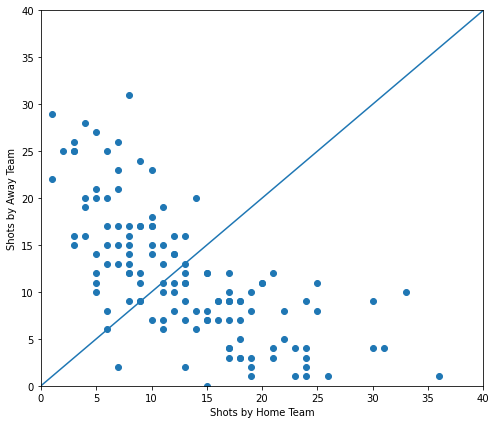

In [88]:
plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.autolayout"] = True

plt.scatter(teams['shots_home'], teams['shots_away'])

plt.xlim(0,40)
plt.ylim(0,40)

plt.xlabel('Shots by Home Team')
plt.ylabel('Shots by Away Team')

plt.plot([0,40],[0,40])

Colorize each points with a specific color for a specific team